In [1]:
import matplotlib
matplotlib.use('TkAgg')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split as tts
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=.1)


np.random.seed(1)


/Users/dyanni3/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyanni3/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyanni3/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyanni3/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyanni3/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyanni3/anaconda/lib/python3.5/si

In [2]:
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)

lr=LogisticRegression()
lr.fit(Xtrain,ytrain)

ridge=RidgeClassifier()
ridge.fit(Xtrain,ytrain);

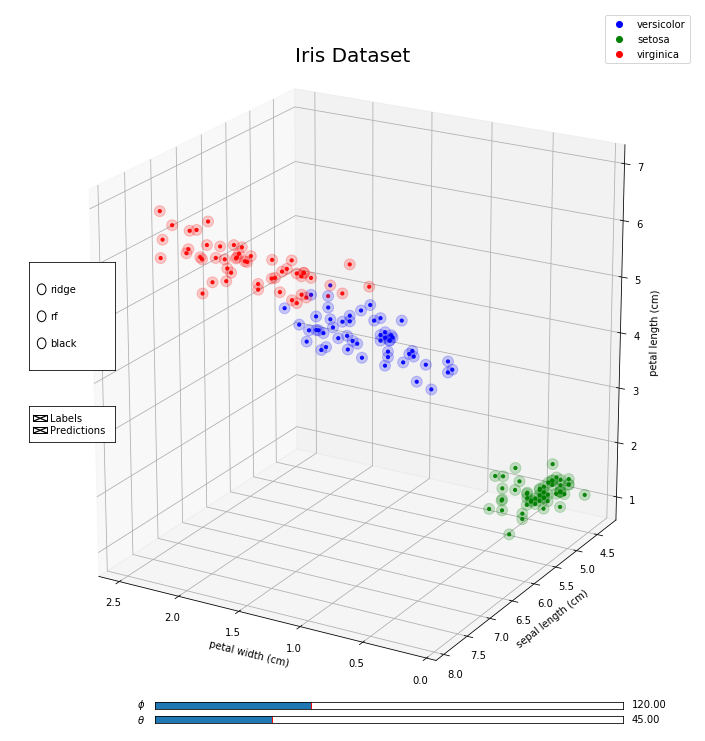

In [19]:
from matplotlib.widgets import Button, RadioButtons, Slider, CheckButtons
#plt.style.use('dark_background')

colors_dict=dict(list(zip(np.unique(y),
                          ['green','blue','red'])))
colors_dict[99]='black'

rf_preds=rf.predict(X)
ridge_preds=ridge.predict(X)
lr_preds=lr.predict(X)

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=.25, bottom=.25)
#ax = fig.add_subplot(111, projection='3d')
#sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2])
slider_val=120


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=slider_val)
pts = ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=[colors_dict[i] for i in y],alpha=.9,s=10)
sc = ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=[colors_dict[i] for i in rf_preds],alpha=.2,s=120)
ax.set_xlabel(iris.feature_names[3])
ax.set_ylabel(iris.feature_names[0])
ax.set_zlabel(iris.feature_names[2])
ax.set_title("Iris Dataset",fontsize=20)
l1=ax.plot([],[],'bo',label=iris.target_names[1])
l2=ax.plot([],[],'go',label=iris.target_names[0])
l3=ax.plot([],[],'ro',label=iris.target_names[2])
ax.legend()

"""plt.gca().patch.set_facecolor('black')
ax.w_xaxis.set_pane_color((0.05, 0.05, 0.05, .5))
ax.w_yaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_zaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))"""

button_ax = fig.add_axes([.025,.4,.12,.05])
button = CheckButtons(button_ax,("Labels","Predictions"),('True','True'))

# Define an axes area and draw a slider in it
phi_slider_ax  = fig.add_axes([0.2, 0.03, 0.65, 0.01])
phi_slider = Slider(phi_slider_ax, r"$\phi$", 0, 360.0, valinit=120.0)

# Draw another slider
theta_slider_ax = fig.add_axes([0.2, 0.01, 0.65, 0.01])
theta_slider = Slider(theta_slider_ax, r"$\theta$", 0.0, 180.0, valinit=45.0)

def phi_on_changed(val):
    ax.azim=val
    fig.canvas.draw_idle()
def theta_on_changed(val):
    ax.elev=val
    fig.canvas.draw_idle()
phi_slider.on_changed(phi_on_changed)
theta_slider.on_changed(theta_on_changed)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.12, 0.15])
color_radios = RadioButtons(color_radios_ax, ('ridge', 'rf', 'black'), active=0,activecolor='white')
preds_labels={'ridge':ridge_preds,'rf':rf_preds,'black':[99 for i in rf_preds]}
ax.vis=1; ax.pvis=1;
def color_radios_on_clicked(label):
    if label == 'Labels':
        ax.vis=1-ax.vis
    elif label == 'Predictions':
        ax.pvis=1-ax.pvis
    else:
        del ax.collections[:]
        if ax.vis:
            pts = ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=[colors_dict[i] for i in y],alpha=.9,s=10)
        if ax.pvis:
            sc = ax.scatter(X[:, 3], X[:, 0], X[:, 2],
                   c=[colors_dict[i] for i in preds_labels[label]],alpha=.2,s=120)
    fig.canvas.draw_idle()

color_radios.on_clicked(color_radios_on_clicked)


def check_func(label):
    if label == 'Labels':
        pts.set_visible(not pts.get_visible())
    elif label == 'Predictions':
        sc.set_visible(not sc.get_visible())
    #fig.canvas.draw_idle()

button.on_clicked(color_radios_on_clicked)

fig
plt.show()

In [4]:
import lime
from lime import lime_tabular
explainer=lime_tabular.LimeTabularExplainer(Xtrain)
from lime import submodular_pick as sp

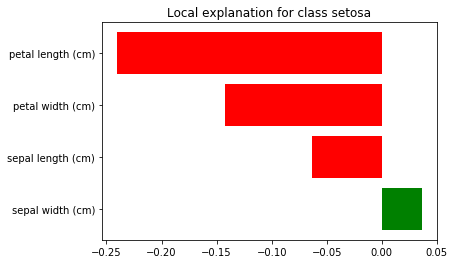

[4.9 3.  1.4 0.2] 0


In [10]:
%matplotlib inline
explainer = lime_tabular.LimeTabularExplainer(feature_names=iris.feature_names,
                                              training_data=X,
                                              class_names=list(iris.target_names),
                                              discretize_continuous=False,
                                              )
explainer.explain_instance(X[1],rf.predict_proba,top_labels=3).as_pyplot_figure(label=0)
plt.show()
print(X[1], rf.predict(X)[1])

In [11]:
sp_obj=sp.SubmodularPick(explainer,X,rf.predict_proba,top_labels=3)

/Users/dyanni3/anaconda/lib/python3.5/site-packages/lime/submodular_pick.py:55: UserWarning: Requested sample size larger than
                                  size of input data. Using all data
  size of input data. Using all data""")


In [12]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list(label=1)) for this in sp_obj.explanations])
W.describe()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,-0.017543,-0.021367,-0.011490,-0.003214
std,0.120432,0.072125,0.036198,0.020699
min,-0.212780,-0.133697,-0.069100,-0.053992
25%,-0.111668,-0.081442,-0.041875,-0.022870
50%,-0.053132,-0.040835,-0.021385,0.002929
75%,0.131593,0.066692,0.031014,0.014017
max,0.173722,0.089072,0.045956,0.038054


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12696dcc0>]],
      dtype=object)

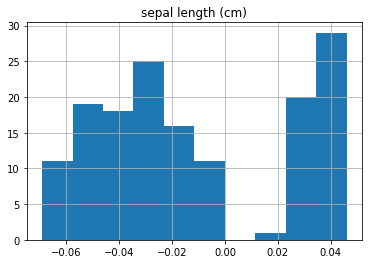

In [13]:
W.hist('sepal length (cm)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1269c8c50>]],
      dtype=object)

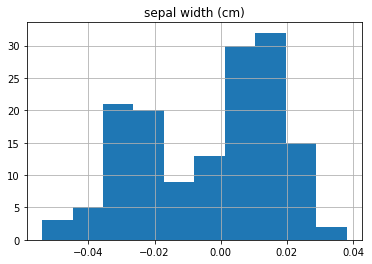

In [14]:
W.hist('sepal width (cm)')

In [25]:
lr.coef_

array([[ 0.40185508,  1.43010309, -2.22221518, -1.0083874 ],
       [ 0.35535699, -1.466735  ,  0.60783135, -1.39233865],
       [-1.59886796, -1.54898658,  2.3772019 ,  2.43579   ]])